Import Library

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Import data dalam CSV

In [6]:
# Membaca data CSV
data = pd.read_csv('emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


Output dari kode di atas yaitu, menampilkan lima baris pertama dari dataset emisi.csv

In [7]:
data.rename(columns={'X': 'Ville (L/100 km)', 'Y': 'Emisi CO2 (g/km)'}, inplace=True)
print(data)

     Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  \
0                 8.1               6.5                   7.4   
1                 8.9               6.5                   7.8   
2                11.1               8.3                   9.9   
3                12.6               9.4                  11.2   
4                13.8              11.2                  12.4   
..                ...               ...                   ...   
637               9.7               7.5                   8.7   
638              10.7               8.1                   9.5   
639              10.1               7.8                   9.1   
640              10.0               7.8                   9.0   
641              11.5               9.0                  10.4   

     Emisi CO2 (g/km)  
0                 172  
1                 181  
2                 230  
3                 263  
4                 291  
..                ...  
637               205  
638               223  
639

# **Analisis**

Menghitung matriks kolerasi

In [8]:
correlation_matrix = data.corr()
print(correlation_matrix)

                      Ville (L/100 km)  Route (L/100 km)  \
Ville (L/100 km)              1.000000          0.909671   
Route (L/100 km)              0.909671          1.000000   
kombinasi (L/100 km)          0.986990          0.961539   
Emisi CO2 (g/km)              0.975617          0.951061   

                      kombinasi (L/100 km)  Emisi CO2 (g/km)  
Ville (L/100 km)                  0.986990          0.975617  
Route (L/100 km)                  0.961539          0.951061  
kombinasi (L/100 km)              1.000000          0.988786  
Emisi CO2 (g/km)                  0.988786          1.000000  


Kode di atas menghitung dan menampilkan matriks korelasi dari DataFrame. Matriks korelasi menunjukkan hubungan linear antara setiap pasangan kolom numerik dalam DataFrame.

Membuat matriks kolerasi

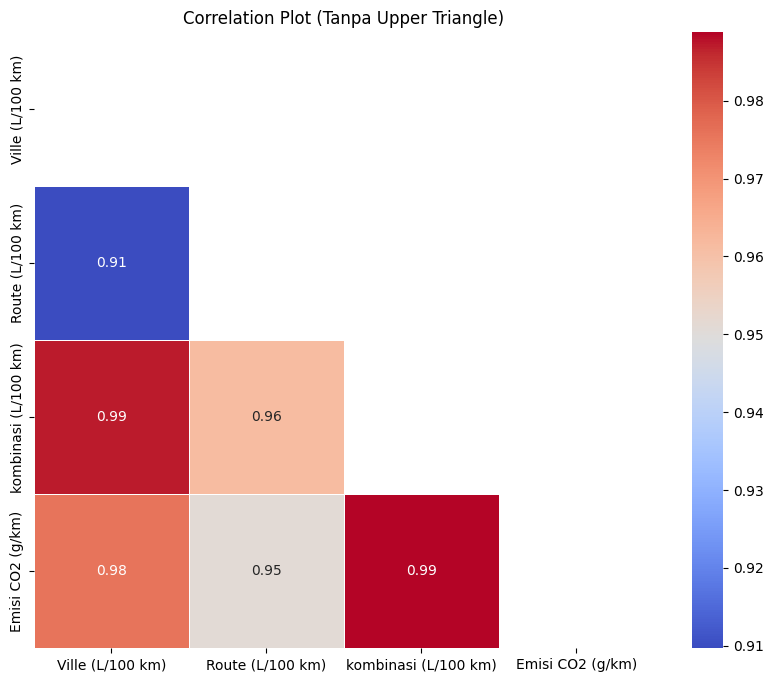

In [10]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Kode di atas menampilkan heatmap korelasi dari DataFrame, tetapi hanya menampilkan bagian lower triangle (segitiga bawah) dengan menyembunyikan bagian atasnya menggunakan mask. Warna dalam heatmap menunjukkan tingkat korelasi antarvariabel, dengan skala warna dari coolwarm, di mana nilai korelasi lebih tinggi atau lebih rendah ditonjolkan dengan warna yang berbeda.

Membuat model regresi sederhana

<Axes: xlabel='Ville (L/100 km)', ylabel='Emisi CO2 (g/km)'>

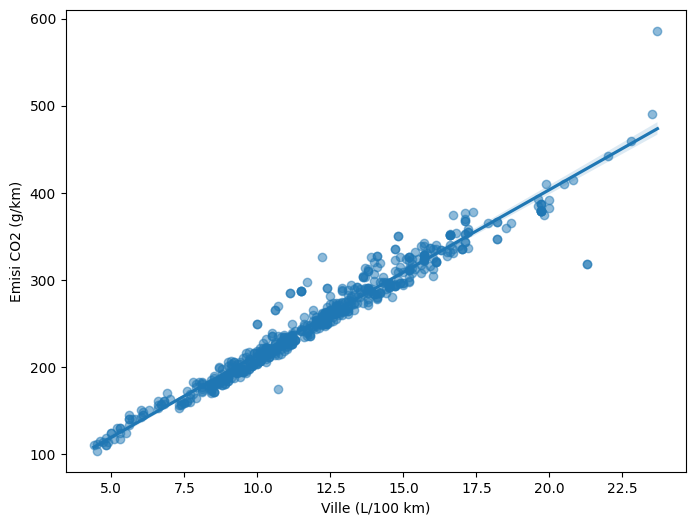

In [11]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="Ville (L/100 km)", y="Emisi CO2 (g/km)", data=data, scatter_kws={"alpha": 0.5})

Kode di atas menampilkan scatter plot dengan garis regresi antara variabel "Ville (L/100 km)" dan "Emisi CO2 (g/km)". Titik-titik pada plot mewakili data, sementara garis regresi menunjukkan tren hubungan linear antara kedua variabel.

In [12]:
# Model regresi sederhana
X = data[["Ville (L/100 km)"]]
Y = data["Emisi CO2 (g/km)"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Emisi CO2 (g/km)   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Tue, 11 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:19:33   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.7691      2.096  

Kode di atas menampilkan ringkasan hasil regresi linear sederhana antara "Ville (L/100 km)" sebagai variabel independen dan "Emisi CO2 (g/km)" sebagai variabel dependen. Outputnya yaitu mencakup koefisien regresi, nilai R-squared, p-value, dan statistik uji lainnya, yang menunjukkan kekuatan dan signifikansi hubungan antara kedua variabel.

Visualisasi hasil prediksi

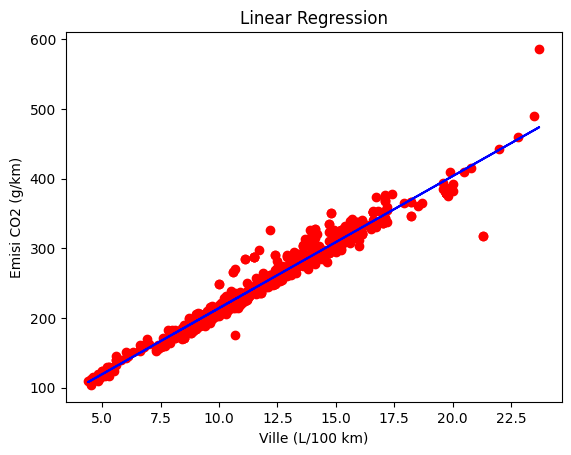

In [15]:
# Visualisasi hasil prediksi
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
plt.scatter(X["Ville (L/100 km)"], Y, color='red')
plt.plot(X["Ville (L/100 km)"], lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode di atas menampilkan scatter plot data asli (dengan titik merah) dan garis regresi linear (dengan garis biru) yang diprediksi oleh model. Grafik ini menunjukkan hubungan antara "Ville (L/100 km)" (konsumsi bahan bakar) dan "Emisi CO2 (g/km)", serta bagaimana model regresi linear memprediksi emisi berdasarkan konsumsi bahan bakar.

# **Evaluasi**

In [17]:
# Evaluasi model
prediksi = lin_reg.predict(X)
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


Kode di atas mengevaluasi kinerja model regresi linear dengan menghitung tiga metrik: MSE untuk mengukur rata-rata kesalahan kuadrat antara nilai asli dan prediksi, MAE untuk mengukur rata-rata selisih absolut antara keduanya, dan R² untuk menunjukkan seberapa baik model menjelaskan variabilitas data.

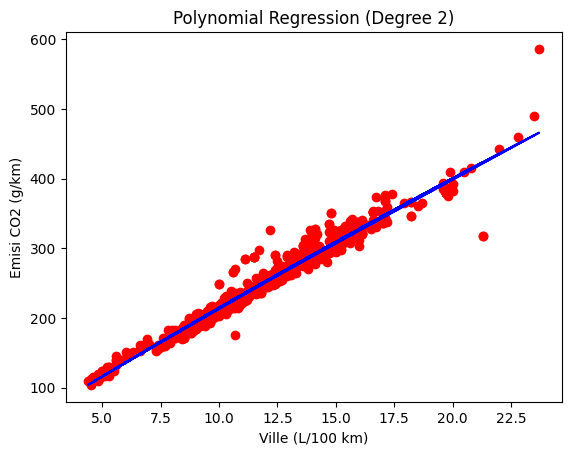

In [18]:
# Visualisasi Polynomial Regression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)
plt.scatter(X["Ville (L/100 km)"], Y, color='red')
plt.plot(X["Ville (L/100 km)"], lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title(f'Polynomial Regression (Degree {poly_reg.degree})') # Use poly_reg.degree to access the degree value
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode di atas menampilkan visualisasi regresi polinomial dengan derajat 2 untuk memodelkan hubungan antara konsumsi bahan bakar di kota dan emisi CO2. Titik merah mewakili data asli, sedangkan garis biru menunjukkan kurva yang diprediksi oleh model polinomial. Kurva ini menangkap pola non-linear dalam data dengan lebih baik dibandingkan regresi linear sederhana.

In [19]:
# Evaluasi model polynomial
Y_poly = lin_reg_2.predict(X_poly)
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521


Kode di atas mengevaluasi kinerja model regresi polinomial dengan menghitung MSE untuk mengukur rata-rata kesalahan kuadrat, MAE untuk mengukur rata-rata selisih absolut, dan R² untuk menilai seberapa baik model menjelaskan variabilitas data. Hasil evaluasi ini digunakan untuk membandingkan akurasi regresi polinomial dengan model regresi linear sebelumnya.